In [1]:
import cv2
from face_recognition import faceRecognitionPipeline
import matplotlib.pyplot as plt


In [2]:
pred_img, pred_dict = faceRecognitionPipeline('./test_images/getty_test.jpg')

In [3]:
pred_dict

[{'roi': array([[0.6       , 0.60784314, 0.61960784, ..., 0.57254902, 0.57647059,
          0.58039216],
         [0.61568627, 0.61960784, 0.62352941, ..., 0.57254902, 0.57647059,
          0.57647059],
         [0.65490196, 0.65490196, 0.65098039, ..., 0.56862745, 0.56470588,
          0.56078431],
         ...,
         [0.28627451, 0.20392157, 0.15294118, ..., 0.10980392, 0.10588235,
          0.10588235],
         [0.17647059, 0.14117647, 0.1254902 , ..., 0.10980392, 0.10588235,
          0.10196078],
         [0.10980392, 0.10588235, 0.10980392, ..., 0.10588235, 0.10196078,
          0.09803922]]),
  'eig_img': array([[ 0.29494806,  0.28649627,  0.27799191, ..., -0.04993929,
          -0.03323594, -0.03574072]]),
  'prediction_name': 'female',
  'score': 0.6202947924812602},
 {'roi': array([[0.71764706, 0.70980392, 0.69019608, ..., 0.60392157, 0.60784314,
          0.61568627],
         [0.69803922, 0.68627451, 0.67058824, ..., 0.62352941, 0.62745098,
          0.61960784],
      

In [4]:
cv2.imshow('Predicted Image',pred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

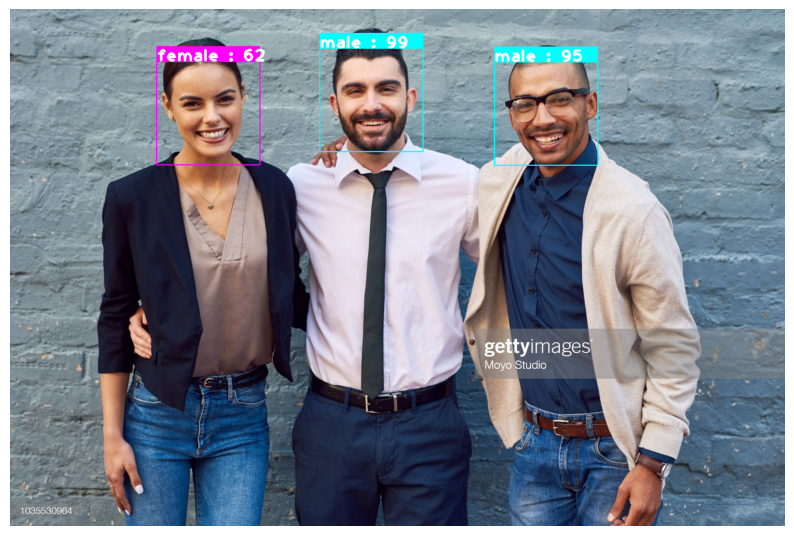

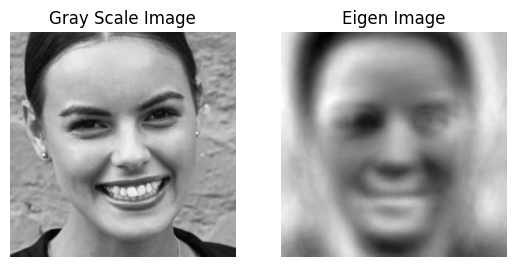

Predicted Gender = female
Predicted Score = 62.03%
----------------------------------------------------------------------------------------------------


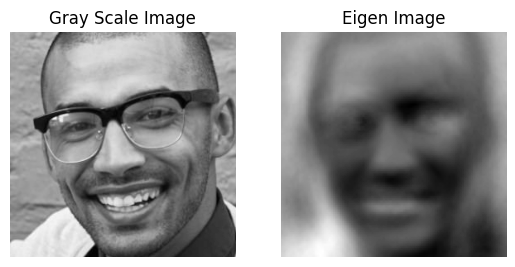

Predicted Gender = male
Predicted Score = 95.34%
----------------------------------------------------------------------------------------------------


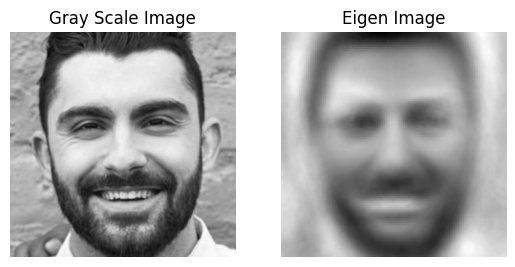

Predicted Gender = male
Predicted Score = 99.14%
----------------------------------------------------------------------------------------------------


In [5]:
img_rgb = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb) # matplotlib shows the image in rgb 
plt.axis('off')
plt.show()

# generate report
for i in range(len(pred_dict)):
    obj_gray = pred_dict[i]['roi'] # grayscale cropped image
    obj_eig = pred_dict[i]['eig_img'].reshape(100,100) # eigen image
    plt.subplot(1,2,1)
    plt.imshow(obj_gray, cmap='gray')
    plt.title('Gray Scale Image')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(obj_eig, cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')
    
    plt.show()
    print('Predicted Gender =', pred_dict[i]['prediction_name'])
    print('Predicted Score = {:,.2f}%'.format(pred_dict[i]['score']*100))
    print('-'*100)

## Real Time Gender Recognition

In [6]:
cap = cv2.VideoCapture('./test_images/video.mp4') 
# 0 -> access webcamera, 1 -> external camera, path of the file or path of the video

In [7]:
while True:
    ret, frame = cap.read()
    
    if ret == False:
        break
    pred_img, pred_dict = faceRecognitionPipeline(frame, path=False)
    
    cv2.imshow('prediction',pred_img)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()